# Download images and predict species
Given a list of urls this notebook will download the images and use [BioCLIP](https://imageomics.github.io/bioclip/) to create species level predictions.

In [1]:
!pip install pybioclip ipywidgets --quiet

In [2]:
import os
import shutil
import requests
from bioclip import TreeOfLifeClassifier, Rank
import pandas as pd
import PIL.Image

## Download images
Download some images from the bioclip-demo (https://huggingface.co/spaces/imageomics/bioclip-demo).

In [3]:
IMAGE_URLS = [
    'https://huggingface.co/spaces/imageomics/bioclip-demo/resolve/main/examples/Ursus-arctos.jpeg',
    'https://huggingface.co/spaces/imageomics/bioclip-demo/resolve/main/examples/Actinostola-abyssorum.png',
    'https://huggingface.co/spaces/imageomics/bioclip-demo/resolve/main/examples/Felis-catus.jpeg',
]
IMAGE_DIR = "images"
THUMBNAIL_SIZE = (256,256)

In [4]:
def download_image(url):
    filename = os.path.basename(url)
    os.makedirs(IMAGE_DIR, exist_ok=True)
    path = os.path.join(IMAGE_DIR, filename)
    response = requests.get(url, stream=True)
    response.raise_for_status()
    with open(path, 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
    return path

image_paths = [download_image(url) for url in IMAGE_URLS]
print("Image paths:")
print(image_paths)

Image paths:
['images/Ursus-arctos.jpeg', 'images/Actinostola-abyssorum.png', 'images/Felis-catus.jpeg']


## Predict species

NOTE: You may see warnings `The secret 'HF_TOKEN' does not exist in your Colab secrets.` and `RuntimeWarning: os.fork()` when running the code block below. Consider setting the HF_TOKEN environment variable to avoid rate limiting errors when running in COLAB. The `os.fork()` warning appears to be a false positive related to [this pytorch issue](https://github.com/pytorch/pytorch/issues/123954).

In [5]:
classifier = TreeOfLifeClassifier(device='cpu')
prediction_ary = classifier.predict(image_paths, rank=Rank.SPECIES)
df = pd.DataFrame(prediction_ary)
df

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  6.40images/s]


,file_name,kingdom,phylum,class,order,family,genus,species_epithet,species,common_name,score
0,images/Ursus-arctos.jpeg,Animalia,Chordata,Mammalia,Carnivora,Ursidae,Ursus,arctos,Ursus arctos,Kodiak bear,0.935603
1,images/Ursus-arctos.jpeg,Animalia,Chordata,Mammalia,Carnivora,Ursidae,Ursus,arctos syriacus,Ursus arctos syriacus,syrian brown bear,0.056170
2,images/Ursus-arctos.jpeg,Animalia,Chordata,Mammalia,Carnivora,Ursidae,Ursus,arctos bruinosus,Ursus arctos bruinosus,,0.004126
3,images/Ursus-arctos.jpeg,Animalia,Chordata,Mammalia,Carnivora,Ursidae,Ursus,arctus,Ursus arctus,,0.002496
4,images/Ursus-arctos.jpeg,Animalia,Chordata,Mammalia,Carnivora,Ursidae,Ursus,americanus,Ursus americanus,Louisiana black bear,0.000501
5,images/Actinostola-abyssorum.png,Animalia,Cnidaria,Anthozoa,Actiniaria,Actiniidae,Urticina,eques,Urticina eques,Horseman anemone,0.648787
6,images/Actinostola-abyssorum.png,Animalia,Cnidaria,Anthozoa,Actiniaria,Actiniidae,Urticina,felina,Urticina felina,Northern Red Anemone,0.128014
7,images/Actinostola-abyssorum.png,Animalia,Cnidaria,Anthozoa,Scleractinia,Fungiidae,Polyphyllia,novaehiberniae,Polyphyllia novaehiberniae,Slipper Coral,0.062747
8,images/Actinostola-abyssorum.png,Animalia,Cnidaria,Anthozoa,Actiniaria,Stichodactylidae,Heteractis,magnifica,Heteractis magnifica,Magnificent Sea Anemone,0.026706
9,images/Actinostola-abyssorum.png,Animalia,Cnidaria,Anthozoa,Actiniaria,Actiniidae,Entacmaea,quadricolor,Entacmaea quadricolor,Bubble-tip Anemone,0.022782


## Display one image and predictions

In [6]:
example_image_path = image_paths[0]

'images/Ursus-arctos.jpeg'

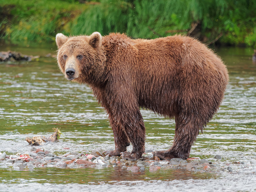

,file_name,kingdom,phylum,class,order,family,genus,species_epithet,species,common_name,score
0,images/Ursus-arctos.jpeg,Animalia,Chordata,Mammalia,Carnivora,Ursidae,Ursus,arctos,Ursus arctos,Kodiak bear,0.935603
1,images/Ursus-arctos.jpeg,Animalia,Chordata,Mammalia,Carnivora,Ursidae,Ursus,arctos syriacus,Ursus arctos syriacus,syrian brown bear,0.056170
2,images/Ursus-arctos.jpeg,Animalia,Chordata,Mammalia,Carnivora,Ursidae,Ursus,arctos bruinosus,Ursus arctos bruinosus,,0.004126
3,images/Ursus-arctos.jpeg,Animalia,Chordata,Mammalia,Carnivora,Ursidae,Ursus,arctus,Ursus arctus,,0.002496
4,images/Ursus-arctos.jpeg,Animalia,Chordata,Mammalia,Carnivora,Ursidae,Ursus,americanus,Ursus americanus,Louisiana black bear,0.000501


In [7]:
image = PIL.Image.open(example_image_path)
image.thumbnail(THUMBNAIL_SIZE)
display(example_image_path)
display(image)
df[df['file_name'] == example_image_path]